# Portfolio Project - Movie Industry Dataset - Correlations

In this project we will try to find correlations between the variables stored in this dataset and the 'gross' column, which corresponds to the Gross Revenue generated from a movie. We will start by importing some python libraries.

In [2]:
import pandas as pd                     
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')                #adjusting plots configuration
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) 

In [3]:
df = pd.read_csv(r'C:\Users\LuKe\Jupyter projects\Luca - Portfolio\movies.csv') #importing the dataset

## Preliminar data cleaning

Before looking into correlations we will have a look at the columns in the dataset, checking if they have the correct datatype and check whether NULL values are present and if something has to be changed to facilitate the analysis.

In [4]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [5]:
df.shape

(6820, 15)

In [6]:
df.isnull().values.any() #checking if there are null values in the dataset

False

In [7]:
df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

There are no null values in this dataset. The columns 'budget' and 'gross' are floats and we want to convert them to integers.

In [8]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [10]:
df.tail()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalh�es,6947,Nicolas Pesce,2016
6819,0,Les Productions du Tr�sor,France,Nicole Garcia,Drama,37757,From the Land of the Moon,R,2017-07-28,120,6.7,Marion Cotillard,2411,Milena Agus,2016


As we can see in the last row, there is a difference between the value of the year in the 'released' column and the one in the 'year' column. After checking the dataset schema, which showed that the two values should match, we are going to create a 'correct_year' column extracting the year from the 'released' column.

In [11]:
df['correct_year'] = df['released'].astype(str).str[:4]

In [12]:
df.tail()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,correct_year
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016,2016
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalh�es,6947,Nicolas Pesce,2016,2016
6819,0,Les Productions du Tr�sor,France,Nicole Garcia,Drama,37757,From the Land of the Moon,R,2017-07-28,120,6.7,Marion Cotillard,2411,Milena Agus,2016,2017


At this point we can cancel the column 'year'.

In [13]:
del df['year']

In [14]:
df.sort_values(by = ['gross'], inplace = False, ascending = False).head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,correct_year
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012


In [13]:
df.drop_duplicates() #drop duplicate rows if there are any

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,correct_year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalh�es,6947,Nicolas Pesce,2016


We can see that the number of rows hasn't changed, meaning that there were no duplicates in this dataset.

## Exploratory Data Analysis

Let's now look at correlations between the numerical columns.

<function matplotlib.pyplot.show(close=None, block=None)>

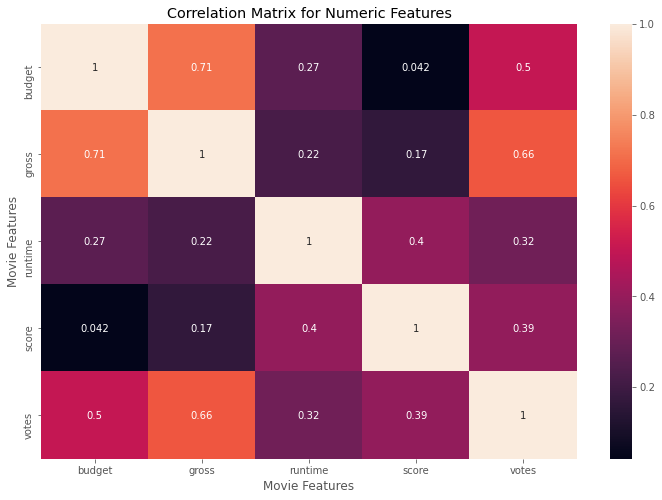

In [20]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot= True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show

We can see that the column 'gross' has a strong correlation with the columns 'budget' and 'votes'. Let's now look at these correlations individually.

### Correlations with 'budget' and 'votes'.

<AxesSubplot:xlabel='budget', ylabel='gross'>

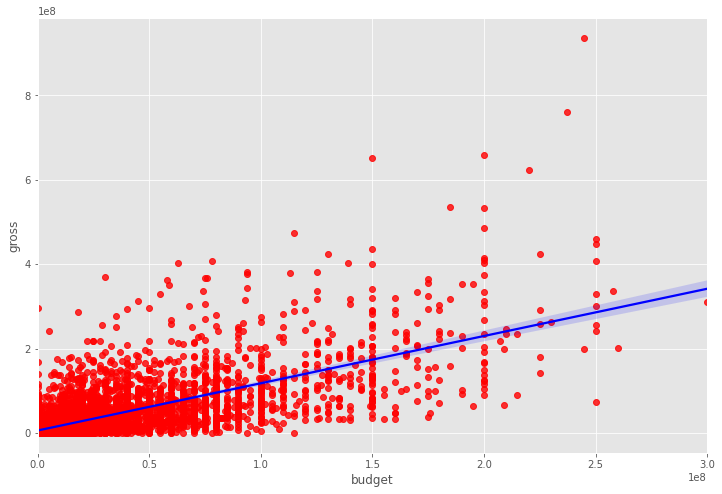

In [19]:
sns.regplot(x= 'budget', y= 'gross', data= df, scatter_kws = {'color':'red'}, line_kws = {'color':'blue'})

<AxesSubplot:xlabel='budget', ylabel='votes'>

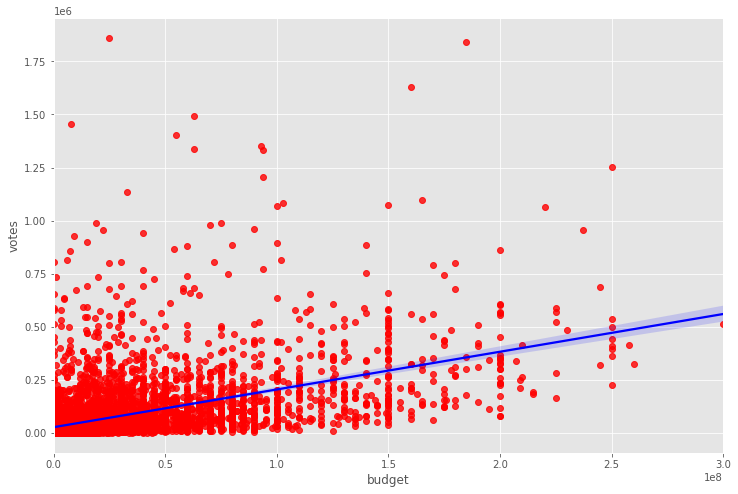

In [18]:
sns.regplot(x= 'budget', y= 'votes', data= df, scatter_kws = {'color':'red'}, line_kws = {'color':'blue'})



These plots tell us that generally, when the budget used to make the movie increases, also the gross revenue increases, and that higher gross revenues are reflected in higher votes from the audience.

Now we will check whether gross revenue genereted by movies has a time trend.

### Time trend

In [23]:
df.groupby('correct_year').gross.mean()

correct_year
1986    1.486475e+07
1987    1.622681e+07
1988    1.629395e+07
1989    1.903168e+07
1990    2.124118e+07
1991    1.896209e+07
1992    2.321303e+07
1993    2.169972e+07
1994    2.344834e+07
1995    2.235356e+07
1996    2.588414e+07
1997    2.974979e+07
1998    2.746274e+07
1999    3.379731e+07
2000    3.362068e+07
2001    3.619181e+07
2002    3.902012e+07
2003    3.912861e+07
2004    4.256796e+07
2005    4.007914e+07
2006    4.029920e+07
2007    4.033614e+07
2008    3.949806e+07
2009    5.183881e+07
2010    4.696258e+07
2011    4.226331e+07
2012    4.655554e+07
2013    4.678780e+07
2014    4.420517e+07
2015    4.720154e+07
2016    4.957556e+07
2017    1.208610e+07
Name: gross, dtype: float64

<AxesSubplot:title={'center':'Average Gross Revenue per Movie from 1986 to 2017'}, xlabel='Year', ylabel='Average Gross Revenue per Movie'>

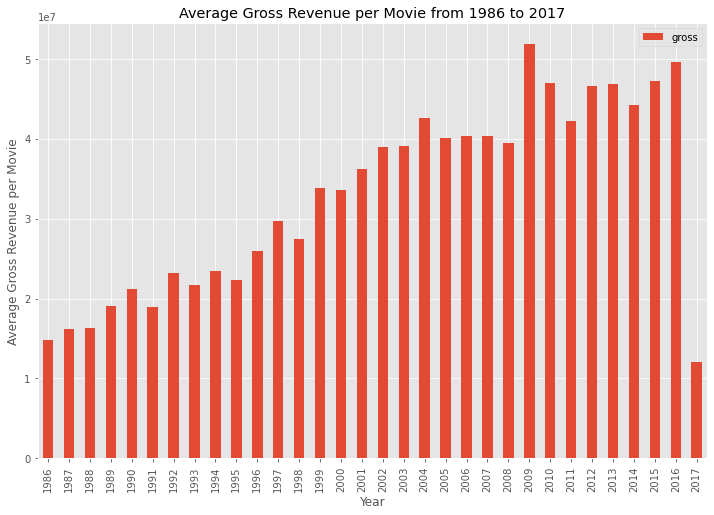

In [24]:
df.groupby('correct_year').gross.mean().plot.bar(xlabel = 'Year', ylabel = 'Average Gross Revenue per Movie', title = 'Average Gross Revenue per Movie from 1986 to 2017', legend = True)


This graph shows that there was a clear positive trend from 1986 until 2009 , meaning that movies averagely generated a higher gross income year after year, and after 2009 the average gross revenue per movie is quite stationary; we can also notice that there is something wrong with the year 2017, probably this dataset contains less movies that were made in 2017. Let's see if that's the case.

In [15]:
len(df[df['correct_year'] == '2017'])  #number of movies from 2017 in the dataset

56

In [16]:
len(df[df['correct_year'] == '2016'])  #number of movies from 2016 in the dataset

218

As we can see we have a shortage of movies from 2017 in this dataset, which justifies the shape of the previous graph. This means that if we want to estimate a value for the trend (for example the percentage increase of the average gross revenue over time) we would need to esclude the rows from 2017.

Now we will have a look at the relationships between some categorical columns and the gross revenue. We'll start from the column 'genre'.

### Correlation with movie genre

In [22]:
df.groupby('genre')['gross'].agg('mean').sort_values(ascending = False)

genre
Animation    9.148810e+07
Action       5.619281e+07
Adventure    5.330381e+07
Mystery      3.631451e+07
Comedy       2.574203e+07
Horror       2.569620e+07
Biography    2.400425e+07
Sci-Fi       2.367705e+07
Fantasy      2.014541e+07
Crime        1.957440e+07
Drama        1.745472e+07
Romance      9.717614e+06
Western      9.259547e+06
Family       8.436443e+06
Thriller     5.533345e+06
Musical      2.023748e+06
War          7.548875e+05
Name: gross, dtype: float64

<AxesSubplot:title={'center':'Average Gross Revenue per Movie by Genre'}, xlabel='Movie Genre', ylabel='Average Gross Revenue per Movie'>

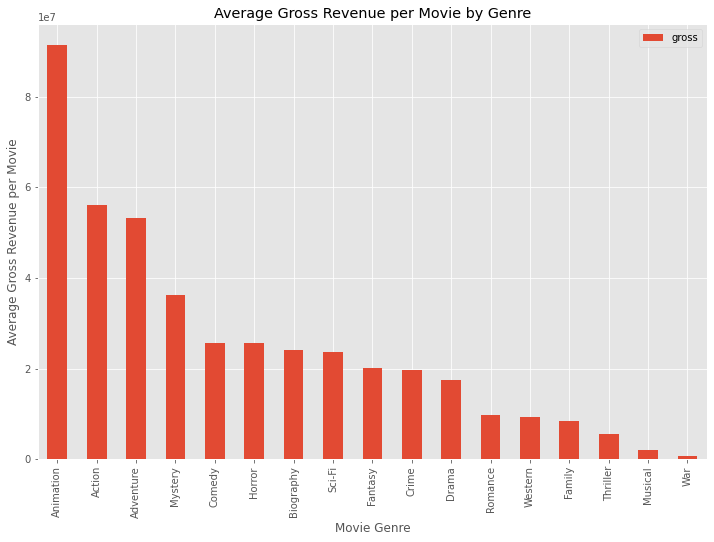

In [25]:
df.groupby('genre')['gross'].agg('mean').sort_values(ascending = False).plot.bar(xlabel = 'Movie Genre', ylabel = 'Average Gross Revenue per Movie', title = 'Average Gross Revenue per Movie by Genre', legend = True)

Here we can see that, on average, animation movies generate the highest gross revenue per movie. 

### Correlation with director's experience

Now we will try to understand if there is a correlation between the gross revenue generated by a movie and the experience of directors. In this case we will approximate the experience of a director to the number of movies directed.

In [26]:
movie_avg_gross_per_director = df.groupby('director')['gross'].agg('mean').sort_values(ascending = True)
movie_avg_gross_per_director.sort_index()

director
A.R. Murugadoss       2.411071e+06
Aamir Khan            1.204660e+06
Aaron Blaise          8.533628e+07
Aaron Harvey          1.887000e+03
Aaron Kim Johnston    1.215480e+05
                          ...     
�lex de la Iglesia    1.965333e+04
�lie Chouraqui        5.195960e+05
�ric Rohmer           2.812862e+05
�tienne Chatiliez     6.046240e+05
�va G�rdos            8.500230e+05
Name: gross, Length: 2759, dtype: float64

In [27]:
n_of_movies_per_director = df['director'].value_counts()
n_of_movies_per_director.sort_index()

A.R. Murugadoss       1
Aamir Khan            1
Aaron Blaise          1
Aaron Harvey          1
Aaron Kim Johnston    1
                     ..
�lex de la Iglesia    3
�lie Chouraqui        1
�ric Rohmer           6
�tienne Chatiliez     1
�va G�rdos            1
Name: director, Length: 2759, dtype: int64

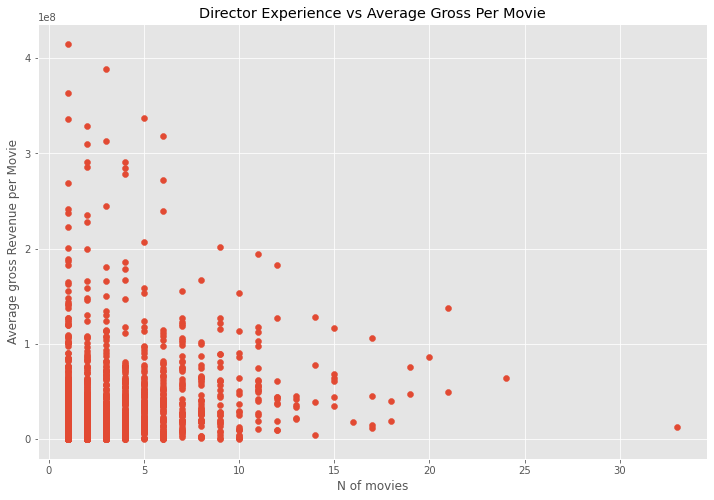

In [29]:
director_table = pd.concat([n_of_movies_per_director, movie_avg_gross_per_director ], axis=1)
director_table.rename(columns = {'director' : 'n of movies'}, inplace = True)
director_table.rename(columns = {'gross' : 'average gross per movie'}, inplace = True)

director_table.sort_values(by = 'n of movies', ascending = False)

plt.scatter(x=director_table['n of movies'], y=director_table['average gross per movie'])

plt.title('Director Experience vs Average Gross Per Movie')

plt.xlabel('N of movies')

plt.ylabel('Average gross Revenue per Movie')


plt.show()

Here we can see that more experienced directors not necessarily make a higher average gross revenue from their movies, actually, the directors with the highest average gross revenue per movie are those who made between 1-5 movies in this dataset.

## Top Twenty

Now we can have a look at which are the top 20 movies that had the highest gross revenue in the history of cinema between 1986-2017 divided by genre.

In [30]:
df.groupby(['genre','name'])['gross'].agg(np.max).sort_values(ascending = False).head(20)

genre      name                                      
Action     Star Wars: The Force Awakens                  936662225
           Avatar                                        760507625
Drama      Titanic                                       658672302
Action     Jurassic World                                652270625
           The Avengers                                  623357910
           The Dark Knight                               534858444
           Rogue One                                     532177324
Animation  Finding Dory                                  486295561
Action     Star Wars: Episode I - The Phantom Menace     474544677
           Avengers: Age of Ultron                       459005868
           The Dark Knight Rises                         448139099
Animation  Shrek 2                                       436471036
Action     The Hunger Games: Catching Fire               424668047
           Pirates of the Caribbean: Dead Man's Chest    423315812
Animatio

In [31]:
top_twenty = df.groupby(['genre','name'])['gross'].agg(np.max).sort_values(ascending = False).head(20) #store top 20 with multi-index into a variable

In [32]:
top_twenty.index

MultiIndex([(   'Action',               'Star Wars: The Force Awakens'),
            (   'Action',                                     'Avatar'),
            (    'Drama',                                    'Titanic'),
            (   'Action',                             'Jurassic World'),
            (   'Action',                               'The Avengers'),
            (   'Action',                            'The Dark Knight'),
            (   'Action',                                  'Rogue One'),
            ('Animation',                               'Finding Dory'),
            (   'Action',  'Star Wars: Episode I - The Phantom Menace'),
            (   'Action',                    'Avengers: Age of Ultron'),
            (   'Action',                      'The Dark Knight Rises'),
            ('Animation',                                    'Shrek 2'),
            (   'Action',            'The Hunger Games: Catching Fire'),
            (   'Action', 'Pirates of the Caribbean

In [33]:
top_twenty = top_twenty.reset_index() #reset index is used to transform the series with multi indexes into a dataframe with a new numerical index and 3 columns

In [34]:
top_twenty.head()

,genre,name,gross
0,Action,Star Wars: The Force Awakens,936662225
1,Action,Avatar,760507625
2,Drama,Titanic,658672302
3,Action,Jurassic World,652270625
4,Action,The Avengers,623357910


In [42]:
top_twenty_pivot = top_twenty.pivot(index = 'name', columns = 'genre', values = 'gross') #this code allows us to transform a dataframe into a pivot table, which will be ideal to display our results

<AxesSubplot:title={'center':'Top 20 Highest Gross Revenue Movies'}, xlabel='Movie name', ylabel='Gross Revenue'>

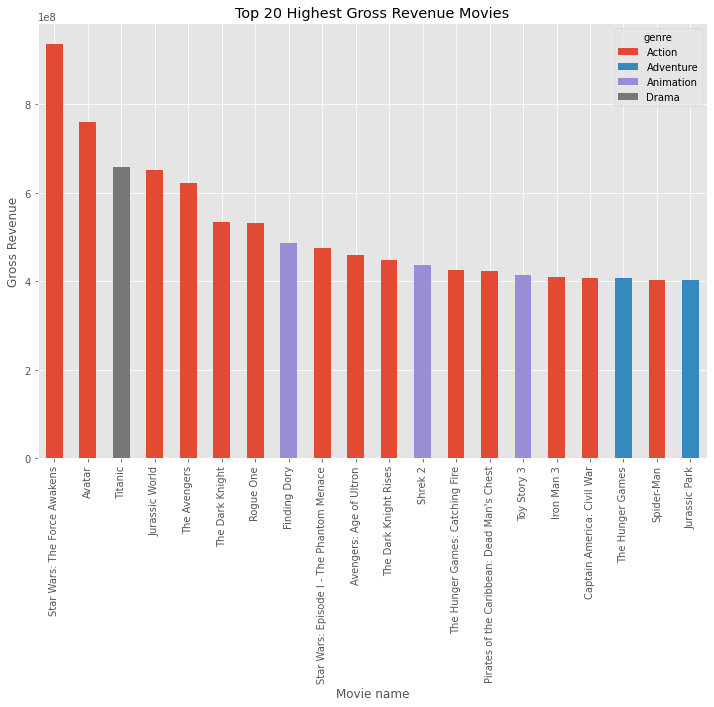

In [44]:
top_twenty_order_list = top_twenty['name'].to_list() #converting a column into a list
#this will be used to oreder the pivot table by gross revenue
top_twenty_pivot = top_twenty_pivot.reindex(top_twenty_order_list) 

top_twenty_pivot.plot(kind = 'bar', stacked = True, xlabel = 'Movie name', ylabel = 'Gross Revenue', title = 'Top 20 Highest Gross Revenue Movies')
